In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df=pd.read_csv('iris.csv',index_col=0)
df = df.set_index('Species')

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
Iris-virginica,6.7,3.0,5.2,2.3
Iris-virginica,6.3,2.5,5.0,1.9
Iris-virginica,6.5,3.0,5.2,2.0


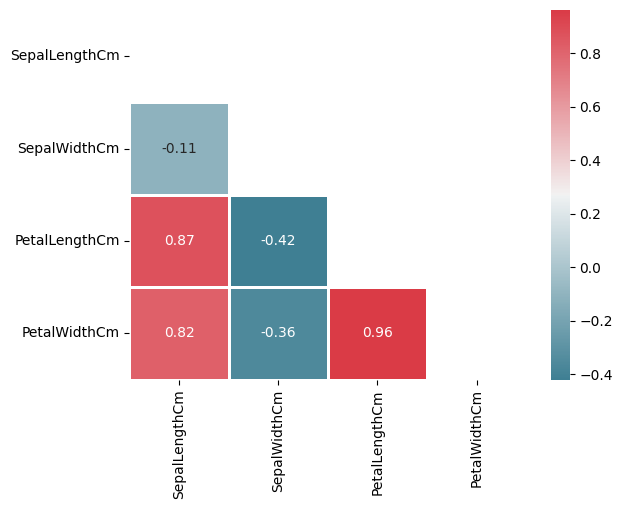

In [2]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

corrs = df.corr()
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True
ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

plt.show()



In [3]:
X = StandardScaler().fit_transform(df.values)

nr_comps=3
pca = PCA(n_components=nr_comps)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head()

,0,1,2
Species,,,
Iris-setosa,-2.264542,0.505704,-0.121943
Iris-setosa,-2.086426,-0.655405,-0.227251
Iris-setosa,-2.367950,-0.318477,0.051480
Iris-setosa,-2.304197,-0.575368,0.098860
Iris-setosa,-2.388777,0.674767,0.021428


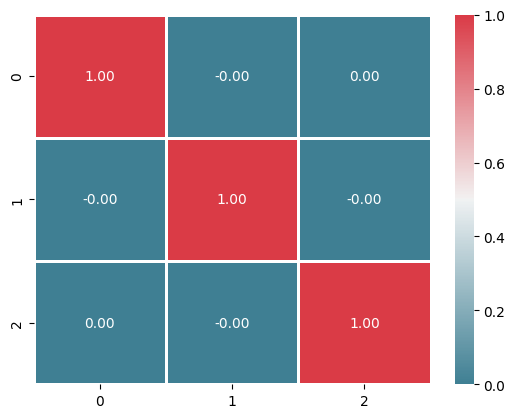

In [4]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,annot=True, fmt=".2f", linewidth=2)
plt.show()

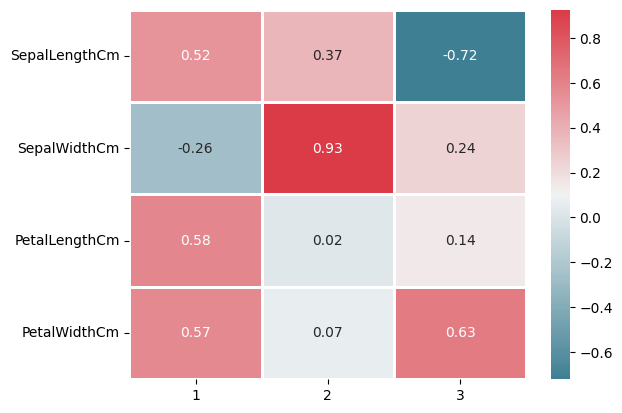

In [5]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,annot=True, fmt=".2f",linewidth=1)
plt.show()

It is likely that relationships between petal length and petal width and petal length and sepal length have been removed from the data